In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats
from sklearn.linear_model import LinearRegression
from tqdm.notebook import tqdm

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 100)

In [19]:
data = pd.read_parquet("../data_users/results_multiple_days.parquet")
print(data.shape)
print(data.columns)
print(data.head())

(47565065, 7)
Index(['UserId', 'SuperUser', 'DaysSinceRegistration', 'Answer_Count', 'Badge_Count', 'Comment_Count', 'Question_Count'], dtype='object')
   UserId  SuperUser  DaysSinceRegistration  Answer_Count  Badge_Count  Comment_Count  Question_Count
0       1       True                      7           4.0          0.0            0.0             2.0
1       5       True                      7           5.0          0.0            2.0             1.0
2       9       True                      7           3.0          0.0            0.0             2.0
3      13       True                      7          10.0          0.0            1.0             2.0
4      17       True                      7          23.0          0.0            1.0             2.0


   DaysSinceRegistration_  Answer_Count_mean  Answer_Count_std  Badge_Count_mean  Badge_Count_std  Comment_Count_mean  Comment_Count_std  Question_Count_mean  Question_Count_std
0                       7           0.384093          2.652853          1.178983         1.039648            0.735870           4.391329             0.461074            1.415338
1                      14           0.508285          3.989482          1.251664         1.194917            0.944207           5.919522             0.518474            1.554811
2                      21           0.615599          5.174593          1.303824         1.316222            1.124933           7.525951             0.565985            1.706254
3                      28           0.714042          6.331825          1.348501         1.435513            1.292161           9.198947             0.606938            1.853096
4                      35           0.806457          7.437575          1.385615         1.537434            1

C:\Users\gian\AppData\Local\Temp\ipykernel_11296\1477514339.py:56: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(bottom=0)


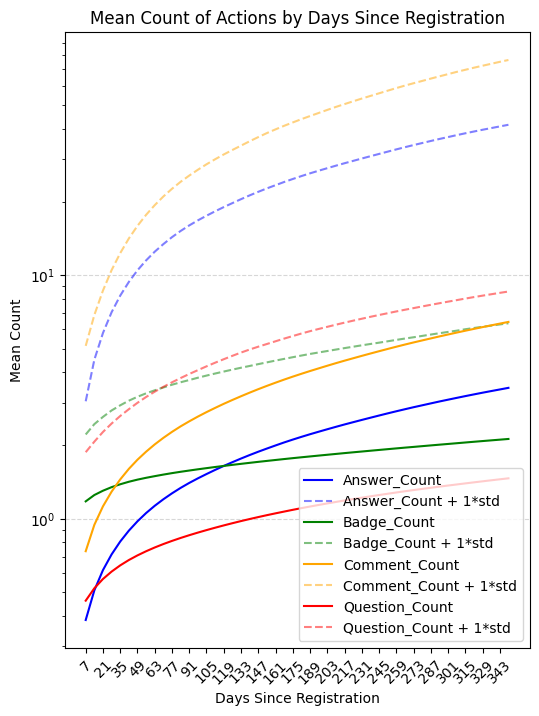

In [18]:
# Step 2: Aggregate the Data
# Define the action count columns you want to plot
action_columns = ["Answer_Count", "Badge_Count", "Comment_Count", "Question_Count"]

# Verify that all required columns are present
missing_cols = [col for col in action_columns if col not in data.columns]
if missing_cols:
    raise ValueError(
        f"The following required columns are missing from the data: {missing_cols}"
    )

# Group by DaysSinceRegistration and calculate mean and std for each action
grouped = (
    data.groupby("DaysSinceRegistration")[action_columns]
    .agg(["mean", "std"])
    .reset_index()
)

grouped.columns = ["_".join(col).strip() for col in grouped.columns.values]
print(grouped.head())

action_colors = {
    "Answer_Count": "blue",
    "Badge_Count": "green",
    "Comment_Count": "orange",
    "Question_Count": "red",
}

plt.figure(figsize=(6, 8))
for action in action_columns:
    plt.plot(
        grouped["DaysSinceRegistration_"].values,
        grouped[f"{action}_mean"].values,
        label=action,
        color=action_colors[action],
    )
    plt.plot(
        grouped["DaysSinceRegistration_"].values,
        grouped[f"{action}_mean"].values + grouped[f"{action}_std"].values,
        color=action_colors[action],
        linestyle="--",
        alpha=0.5,
        label=f"{action} + 1*std",
    )

# x ticks from 7 to 70 with steps of 7
plt.xticks(np.arange(7, 357, 14), rotation=45)

plt.semilogy()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.xlabel("Days Since Registration")
plt.ylabel("Mean Count")
plt.legend()
plt.title("Mean Count of Actions by Days Since Registration")
plt.ylim(bottom=0)
plt.show()